/home/rguyon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,3,7,8,9,10,14,17,20,21,22,23,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['AUTOMOBILEDACIAS.A.' 'TRANSPORTSCLAUDIUSCAILLOT' 'SOFRASTOCK'
 'ILNGRANDCOURONNE' 'PFCATMONTSOULT']


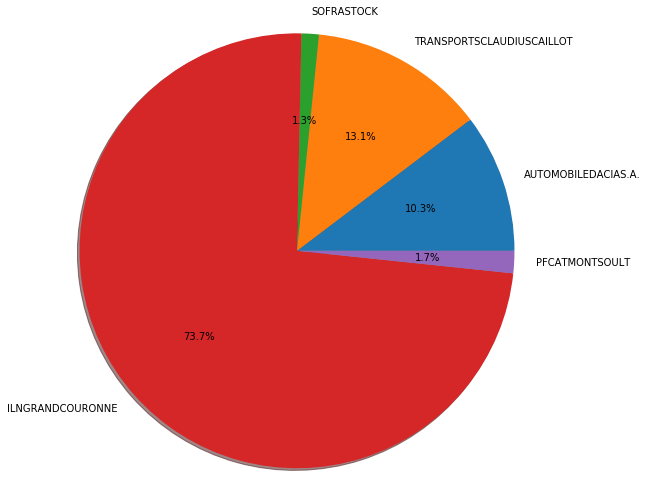

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



# Read the csv file

df = pd.read_csv('TBF115_ITEM_PREF_ORIGIN_DATA_TABLE.csv')

df2 = pd.read_csv('item.csv')

df4 = pd.read_csv('TBR012_LOCATION_DATA_TABLE.csv')

df4.rename(index=str, columns={"LOCATION_ID": "SENDER_SITE_LOC_ID"}, inplace=True)

#print(list(df4.columns.values))

# Condition on origin_preferential (1 means certificated item)

#df = df[df['ORIGIN_PREFERENTIAL'] == 1 ]


# merge two dataframe by the items present on df

df3 = pd.merge(df, df2, on='ITEM_ID', how='left')




# Count the certificated number

certificatedItemsNumber = df['ORIGIN_PREFERENTIAL'].count()


# Computes the percentage of certificated items by sender_site_loc_id

seriesCertificated = df3.groupby('SENDER_SITE_LOC_ID')['ORIGIN_PREFERENTIAL'].count()/certificatedItemsNumber*100


# Transform the pandas series into a dataframe with the speicied columns below

dfcertificated = pd.DataFrame({'SENDER_SITE_LOC_ID':seriesCertificated.index, 'CERTIFICATED_ITEMS':seriesCertificated.values})


df5 = pd.merge(dfcertificated, df4, on='SENDER_SITE_LOC_ID', how='left')

#print(df5)

temp = df5['COMPANY_NAME_1'].values

print(temp)

# Set up pie parameters

labels = df5['COMPANY_NAME_1'].values

sizes = df5['CERTIFICATED_ITEMS'].values

fig = plt.figure(figsize=[5, 5])

plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,  radius = 2)

# plot


plt.show()

